#📌미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다.

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!

[참고] 한글폰트 설정 : https://github.com/ychoi-kr/koreanize-matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib


In [2]:
import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

#📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!



🔽 딕셔너리

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

🔽 출력 예시

다음 이미지와 같은 결과가 나오며, 소숫점 표현 방식이 다르더라도 출력값이 같으면 상관 없습니다.

예를 들어 예시결과는 32인데 직접 구한 값이 32.0 로 보이더라도 상관이 없습니다.

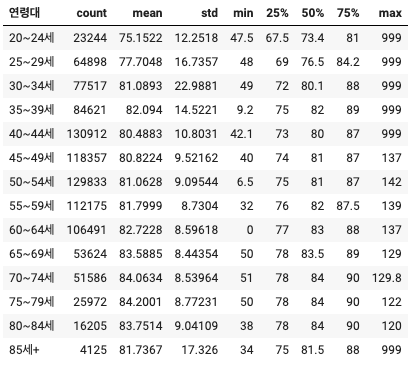

##연령대코드(5세단위)를 "연령대"로 만들기

In [4]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

##기술통계값

In [5]:
age_waist=df.groupby(["연령대"])["허리둘레"].describe()

In [6]:
age_waist

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

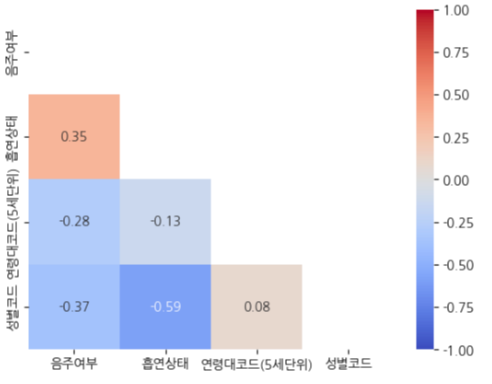

##음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수

In [7]:
columns=['음주여부','흡연상태','연령대코드(5세단위)','성별코드']
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


##상관계수 시각화

<ipython-input-8-5f71360a6217>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<Axes: >

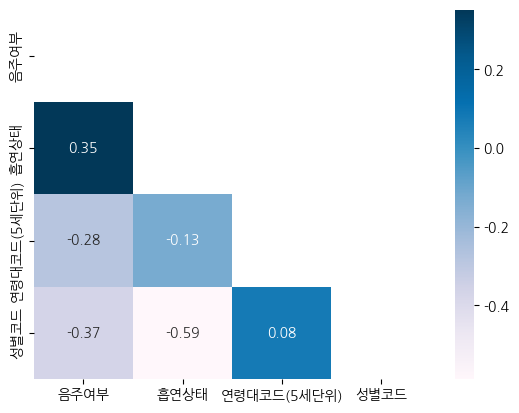

In [8]:
import matplotlib.pyplot as plt
import numpy as np

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
#plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="PuBu", mask=mask)

#📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [9]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

* groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
*crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
*그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

🔽 출력 예시

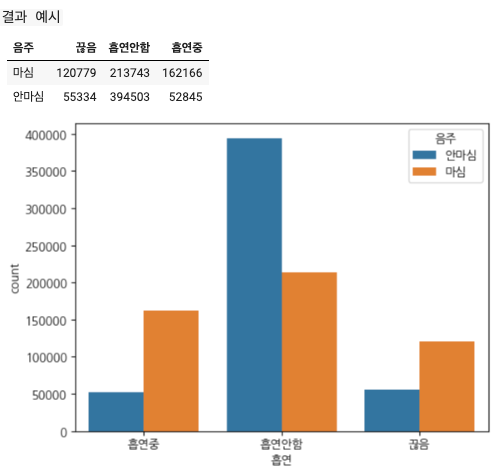

##딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경

In [10]:
df['흡연'] = df['흡연상태'].map(smoke)

In [11]:
df['음주']=df['음주여부'].map(drink)

##전체 데이터에서 음주와 흡연에 대한 교차 테이블

In [12]:
cross_table = pd.crosstab(df["음주"], df["흡연"],dropna = False)
cross_table

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


##시각화

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='흡연', ylabel='count'>

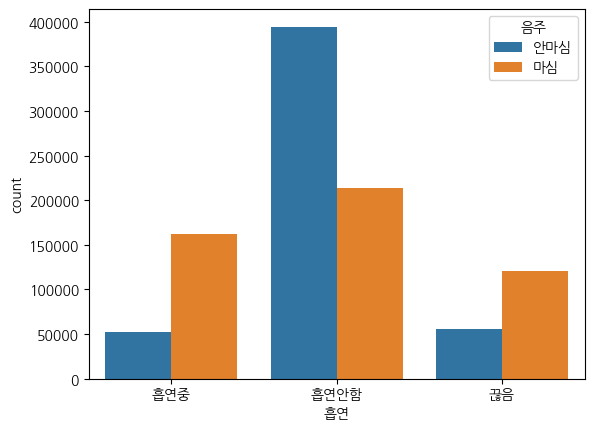

In [14]:
sns.countplot(data=df, x="흡연", hue="음주")

#📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


🔽 출력 예시

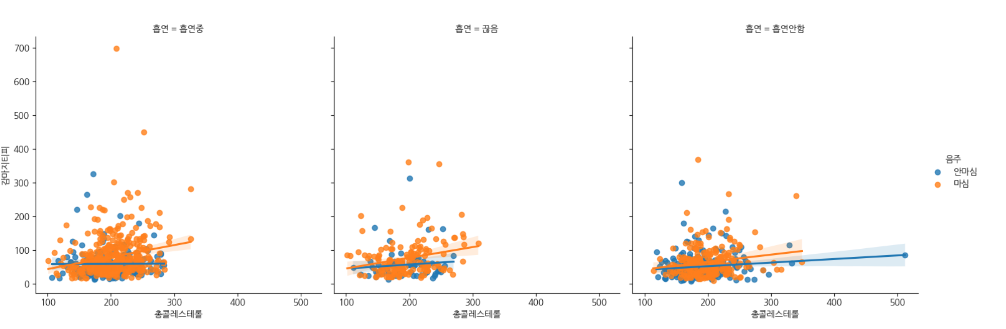

##120Kg 이상인 데이터

In [15]:
over_weight=df[df['체중(5Kg 단위)']>120]

##"총콜레스테롤", "감마지티피" 값 산점도

<Figure size 800x700 with 0 Axes>

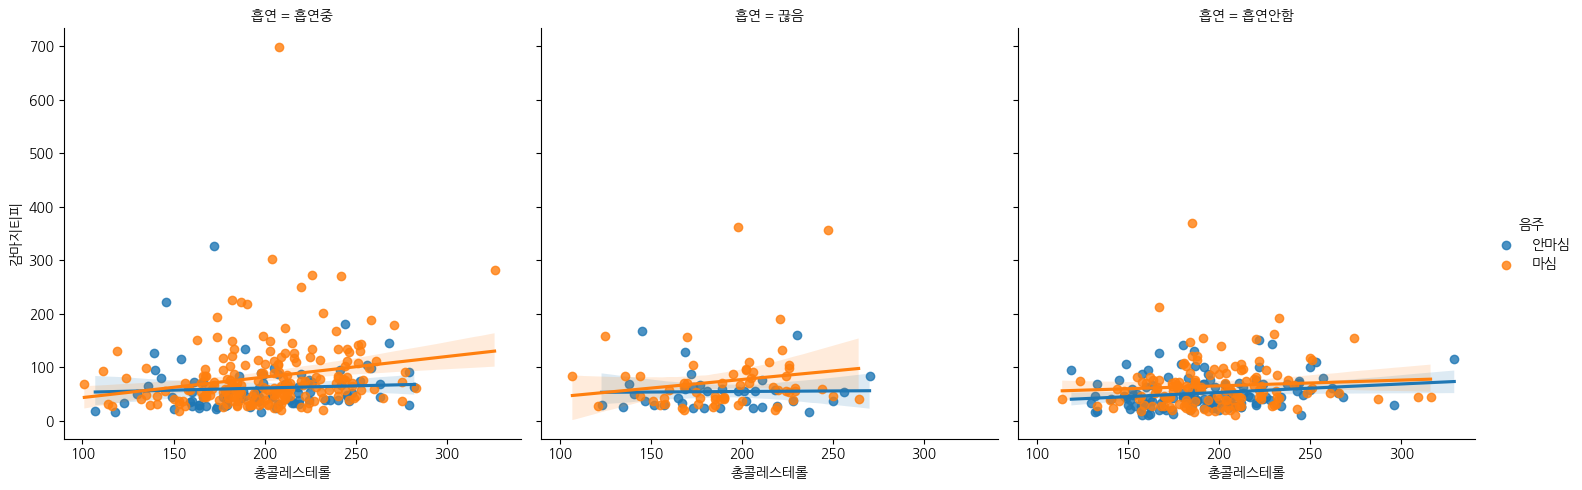

In [16]:
plt.figure(figsize=(8, 7))
sns.lmplot(data=over_weight, x="총콜레스테롤", y="감마지티피", hue="음주",col="흡연")

#📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.



🔽 출력예시

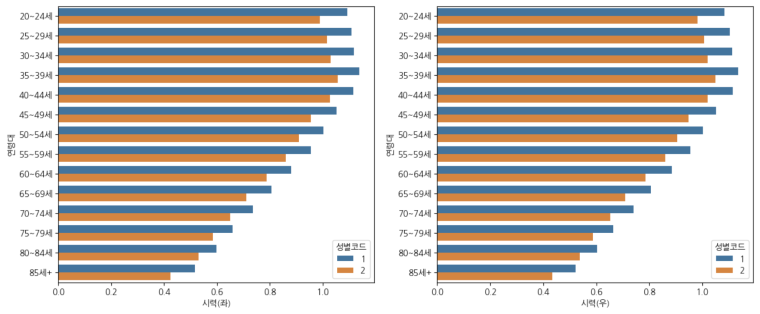

##실명 데이터 삭제

In [17]:
df = df[df['시력(좌)'] != 9.9]
df = df[df['시력(우)'] != 9.9]

##평균 구하기

In [18]:
average_vision = df.groupby(['연령대', '성별코드'])[['시력(좌)', '시력(우)']].mean().reset_index()

##시각화

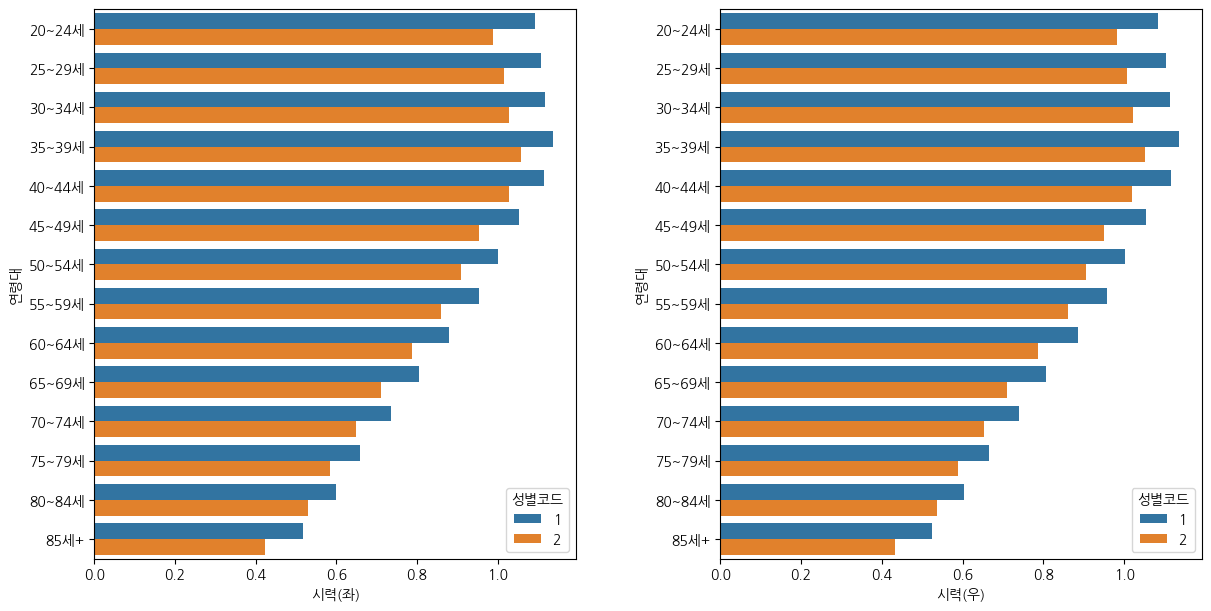

In [19]:
fig,ax=plt.subplots(ncols=2,figsize=(12,6),gridspec_kw={'wspace':0.1},constrained_layout=True)

b1=sns.barplot(data=average_vision,x='시력(좌)',y='연령대',hue='성별코드',ax=ax[0])
b2=sns.barplot(data=average_vision,x='시력(우)',y='연령대',hue='성별코드',ax=ax[1])